In [6]:
"""
Author: Hayden Hedman
Date: August 2025

Project: Engagement Lift Analysis
Module: 02_exploratory_analysis.ipynb

Purpose:
--------
This notebook performs exploratory data analysis (EDA) on the simulated user engagement dataset. 
The goal is to understand baseline group characteristics and engagement trends prior to formal modeling.

Key Tasks:
----------
- Load user-level and time series data
- Summarize and visualize user demographics and treatment assignments
- Examine daily engagement patterns over time
- Identify pre-treatment balance and natural variation
"""
# 02_exploratory_analysis.ipynb
# Author: Hayden Hedman
# Purpose: Exploratory data analysis (EDA) for evaluating engagement effects of a new recommendation engine.
"""
Author: Hayden Hedman
Date: August 2025

Project: Engagement Lift Analysis
Module: 02_exploratory_analysis.ipynb

Purpose:
--------
This notebook performs exploratory data analysis (EDA) on the simulated user engagement dataset. 
The goal is to understand baseline group characteristics and engagement trends prior to formal modeling.

Key Tasks:
----------
- Load user-level and time series data
- Summarize and visualize user demographics and treatment assignments
- Examine daily engagement patterns over time
- Identify pre-treatment balance and natural variation
"""
"""
Author: Hayden Hedman
Date: August 2025

Project: Engagement Lift Analysis
Module: 02_exploratory_analysis.ipynb

Purpose:
--------
This notebook performs exploratory data analysis (EDA) on the simulated user engagement dataset. 
The goal is to understand baseline group characteristics and engagement trends prior to formal modeling.

Key Tasks:
----------
- Load user-level and time series data
- Summarize and visualize user demographics and treatment assignments
- Examine daily engagement patterns over time
- Identify pre-treatment balance and natural variation
"""

'\nAuthor: Hayden Hedman\nDate: August 2025\n\nProject: Engagement Lift Analysis\nModule: 02_exploratory_analysis.ipynb\n\nPurpose:\n--------\nThis notebook performs exploratory data analysis (EDA) on the simulated user engagement dataset. \nThe goal is to understand baseline group characteristics and engagement trends prior to formal modeling.\n\nKey Tasks:\n----------\n- Load user-level and time series data\n- Summarize and visualize user demographics and treatment assignments\n- Examine daily engagement patterns over time\n- Identify pre-treatment balance and natural variation\n'

In [7]:
# Imports 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Global Plot Settings
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "lines.linewidth": 2.5,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--",
    "grid.color": "#999999",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "figure.dpi": 100,
})

In [9]:
#  Load or Simulate Data 
if not os.path.exists("data/users.csv") or not os.path.exists("data/engagement_timeseries.csv"):
    print("CSV files not found — simulating synthetic data inline...")

    np.random.seed(42)
    n_users = 2000
    dates = pd.date_range(start="2023-01-01", periods=60)

    users = pd.DataFrame({
        "user_id": range(1, n_users + 1),
        "signup_date": np.random.choice(dates[:15], n_users),
        "new_rec_engine": np.random.binomial(n=1, p=0.5, size=n_users),
    })

    users["baseline_engagement"] = np.random.normal(loc=30, scale=10, size=n_users).clip(5, 60)

    timeseries = []
    for _, row in users.iterrows():
        for date in dates:
            baseline = row["baseline_engagement"]
            lift = 1.2 if row["new_rec_engine"] == 1 and date >= row["signup_date"] + pd.Timedelta(days=14) else 1.0
            noise = np.random.normal(loc=0.0, scale=2.5)
            engagement = max(0, baseline * lift + noise)

            timeseries.append({
                "user_id": row["user_id"],
                "date": date,
                "engagement": engagement,
            })

    timeseries = pd.DataFrame(timeseries)

else:
    users = pd.read_csv("data/users.csv", parse_dates=["signup_date"])
    timeseries = pd.read_csv("data/engagement_timeseries.csv", parse_dates=["date"])

# Data Preview
print("Users:")
display(users.head())

print("\nTimeseries:")
display(timeseries.head())

# Summary Statistics
print("\nTreatment group assignment:")
print(users["new_rec_engine"].value_counts(normalize=True))

print("\nBaseline engagement mean by group:")
print(users.groupby("new_rec_engine")["baseline_engagement"].mean())

CSV files not found — simulating synthetic data inline...
Users:


,user_id,signup_date,new_rec_engine,baseline_engagement
0,1,2023-01-07,0,25.989411
1,2,2023-01-04,0,48.706634
2,3,2023-01-13,0,31.146215
3,4,2023-01-15,1,21.241004
4,5,2023-01-11,1,43.745335



Timeseries:


,user_id,date,engagement
0,1,2023-01-01,30.132268
1,1,2023-01-02,28.753444
2,1,2023-01-03,24.832021
3,1,2023-01-04,22.508721
4,1,2023-01-05,26.670834



Treatment group assignment:
new_rec_engine
1    0.511
0    0.489
Name: proportion, dtype: float64

Baseline engagement mean by group:
new_rec_engine
0    30.317086
1    30.066728
Name: baseline_engagement, dtype: float64


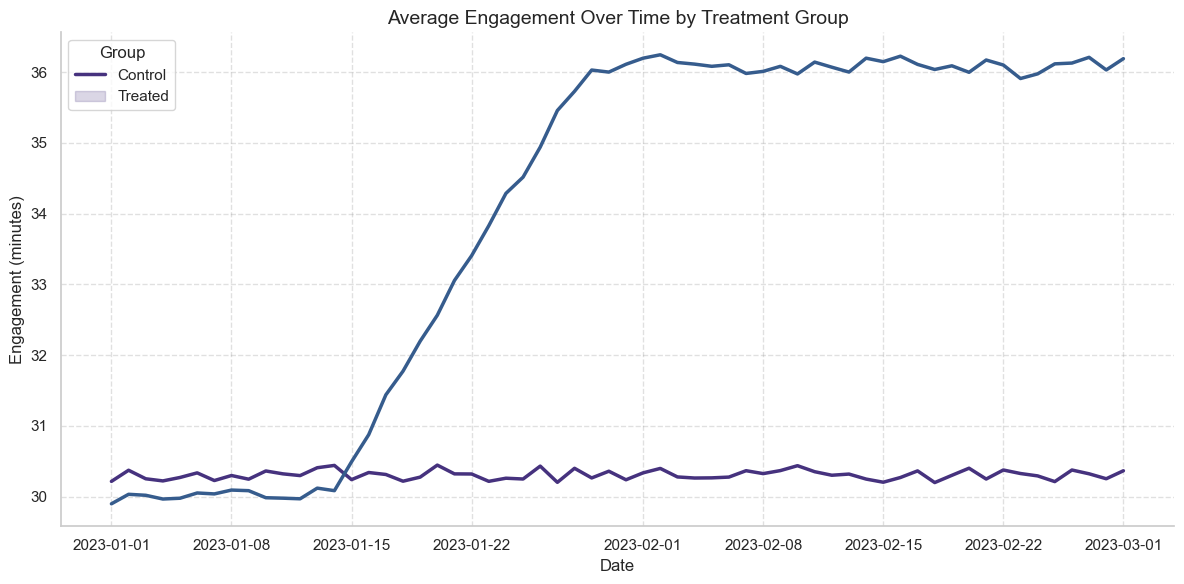

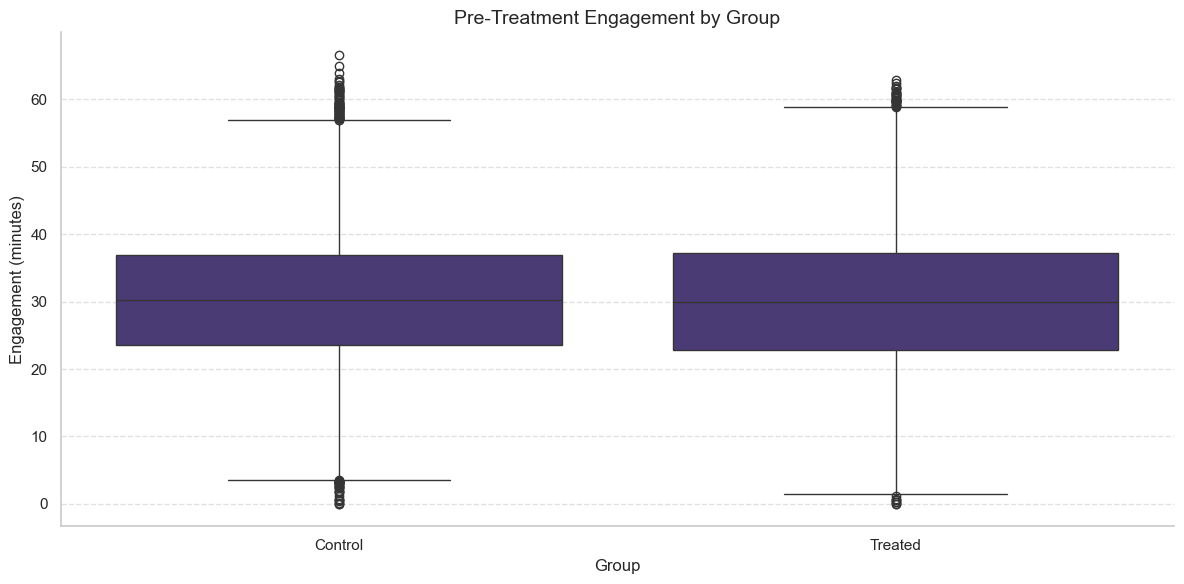

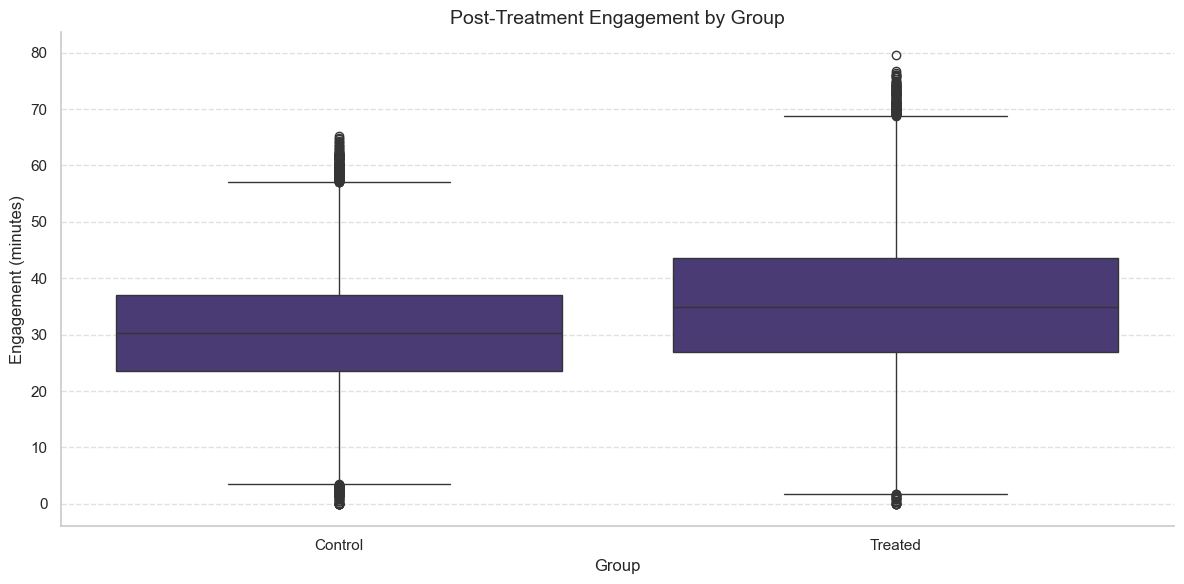

In [10]:
# Merge Datasets 
merged = timeseries.merge(users, on="user_id")

#  Engagement Trend by Group 
engagement_trend = (
    merged.groupby(["date", "new_rec_engine"])["engagement"]
    .mean()
    .reset_index()
)

plt.figure()
sns.lineplot(data=engagement_trend, x="date", y="engagement", hue="new_rec_engine")
plt.title("Average Engagement Over Time by Treatment Group")
plt.xlabel("Date")
plt.ylabel("Engagement (minutes)")
plt.legend(title="Group", labels=["Control", "Treated"], loc="best")
plt.tight_layout()
plt.show()

# Pre-Treatment Comparison
cutoff_date = merged["signup_date"].min() + pd.Timedelta(days=14)
pre = merged[merged["date"] < cutoff_date]

plt.figure()
sns.boxplot(data=pre, x="new_rec_engine", y="engagement")
plt.title("Pre-Treatment Engagement by Group")
plt.xlabel("Group")
plt.ylabel("Engagement (minutes)")
plt.xticks([0, 1], ["Control", "Treated"])
plt.tight_layout()
plt.show()

# Post-Treatment Comparison
post = merged[merged["date"] >= cutoff_date]

plt.figure()
sns.boxplot(data=post, x="new_rec_engine", y="engagement")
plt.title("Post-Treatment Engagement by Group")
plt.xlabel("Group")
plt.ylabel("Engagement (minutes)")
plt.xticks([0, 1], ["Control", "Treated"])
plt.tight_layout()
plt.show()